In [ ]:
import nltk ,warnings,string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline
from sklearn.model_selection import train_test_split
import scipy
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/heart_data.csv')
df

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
x=df[['cholesterol','gluc','smoke','alco','active','ap_hi','ap_lo','height','weight','age']]
y=df['cardio']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
k=50
result={}
for i in range(1,k,2):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  knn_pred=knn.predict(x_test)
  #print result in a dict
  result[i]=accuracy_score(y_test,knn_pred)
print(result)


{1: 0.6260952380952381, 3: 0.664952380952381, 5: 0.6807142857142857, 7: 0.6934285714285714, 9: 0.6971428571428572, 11: 0.7018571428571428, 13: 0.7064285714285714, 15: 0.7082380952380952, 17: 0.7100952380952381, 19: 0.7110952380952381, 21: 0.7124761904761905, 23: 0.7123333333333334, 25: 0.7122380952380952, 27: 0.7113333333333334, 29: 0.7113809523809523, 31: 0.7102380952380952, 33: 0.7106666666666667, 35: 0.710952380952381, 37: 0.7102857142857143, 39: 0.7104761904761905, 41: 0.7095238095238096, 43: 0.7108571428571429, 45: 0.7102857142857143, 47: 0.7101904761904761, 49: 0.7104285714285714}


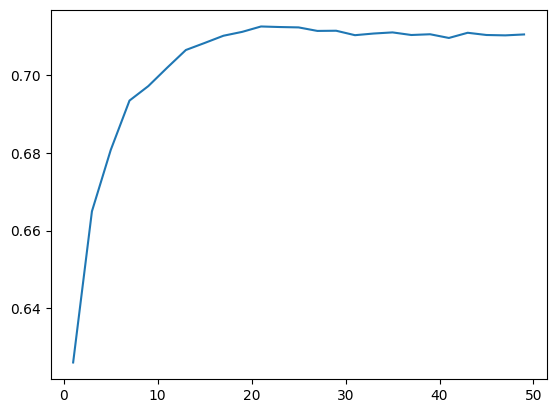

In [ ]:
plt.plot(list(result.keys()),list(result.values()))
plt.show()

In [ ]:
for i in x:
  pointbiserial= scipy.stats.pointbiserialr(df[i],y)
  print(pointbiserial)

SignificanceResult(statistic=0.2211472739123964, pvalue=0.0)
SignificanceResult(statistic=0.089306887324303, pvalue=6.4830425915505e-124)
SignificanceResult(statistic=-0.015485935661367198, pvalue=4.178779876604094e-05)
SignificanceResult(statistic=-0.00733023172320282, pvalue=0.052454057171352333)
SignificanceResult(statistic=-0.03565324811518942, pvalue=3.880438334030143e-21)
SignificanceResult(statistic=0.05447505392686608, pvalue=3.698092126370354e-47)
SignificanceResult(statistic=0.06571869614919003, pvalue=7.424551292672227e-68)
SignificanceResult(statistic=-0.010821058331005239, pvalue=0.00419629881362993)
SignificanceResult(statistic=0.18165956179862647, pvalue=0.0)
SignificanceResult(statistic=0.23815922744230644, pvalue=0.0)


In [ ]:
x1 = df[['cholesterol','weight','age']]
y1 = df['cardio']

In [ ]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3,random_state=42)

In [ ]:
k=50
result1={}
for i in range(1,k,2):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x1_train,y1_train)
  knn_pred=knn.predict(x1_test)
  #print result in a dict
  result1[i]=accuracy_score(y1_test,knn_pred)

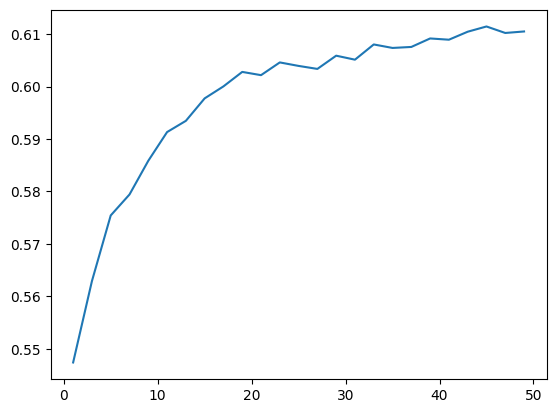

In [ ]:
plt.plot(list(result1.keys()),list(result1.values()))
plt.show()

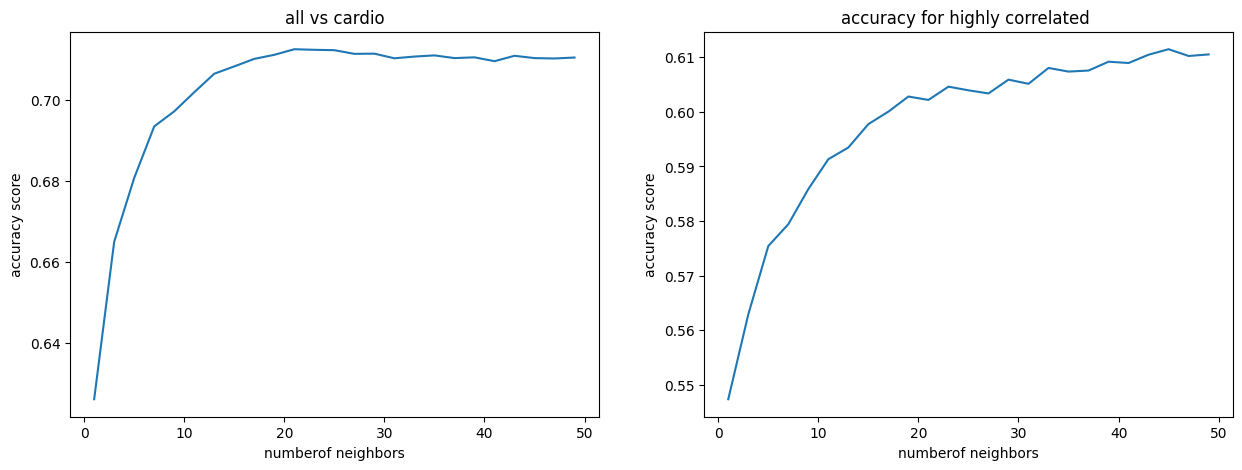

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(list(result.keys()),list(result.values()))
plt.title('all vs cardio')
plt.xlabel('numberof neighbors')
plt.ylabel('accuracy score')
plt.subplot(1,2,2)
plt.plot(list(result1.keys()),list(result1.values()))
plt.title('accuracy for highly correlated ')
plt.xlabel('numberof neighbors')
plt.ylabel('accuracy score')
plt.show()

In [ ]:
x2=df[['cholesterol','gluc','smoke','alco','active','ap_hi','ap_lo','height','weight','age']]
y2=df['cardio']

In [ ]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.3,random_state=42)

In [ ]:
scaler = StandardScaler()
x2_train = scaler.fit_transform(x2_train)
x2_test = scaler.transform(x2_test)

In [ ]:
k=50
result2={}
for i in range(1,k,2):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x2_train,y2_train)
  knn_pred=knn.predict(x2_test)
  #print result in a dict
  result2[i]=accuracy_score(y2_test,knn_pred)


In [ ]:
x3=df[['cholesterol','weight','age']]
y3=df['cardio']

In [ ]:
x3_train,x3_test,y3_train,y3_test=train_test_split(x3,y3,test_size=0.3,random_state=42)

In [ ]:
scaler = StandardScaler()
x3_train = scaler.fit_transform(x3_train)
x3_test = scaler.transform(x3_test)

In [ ]:
k=50
result3={}
for i in range(1,k,2):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x3_train,y3_train)
  knn_pred=knn.predict(x3_test)
  #print result in a dict
  result3[i]=accuracy_score(y3_test,knn_pred)

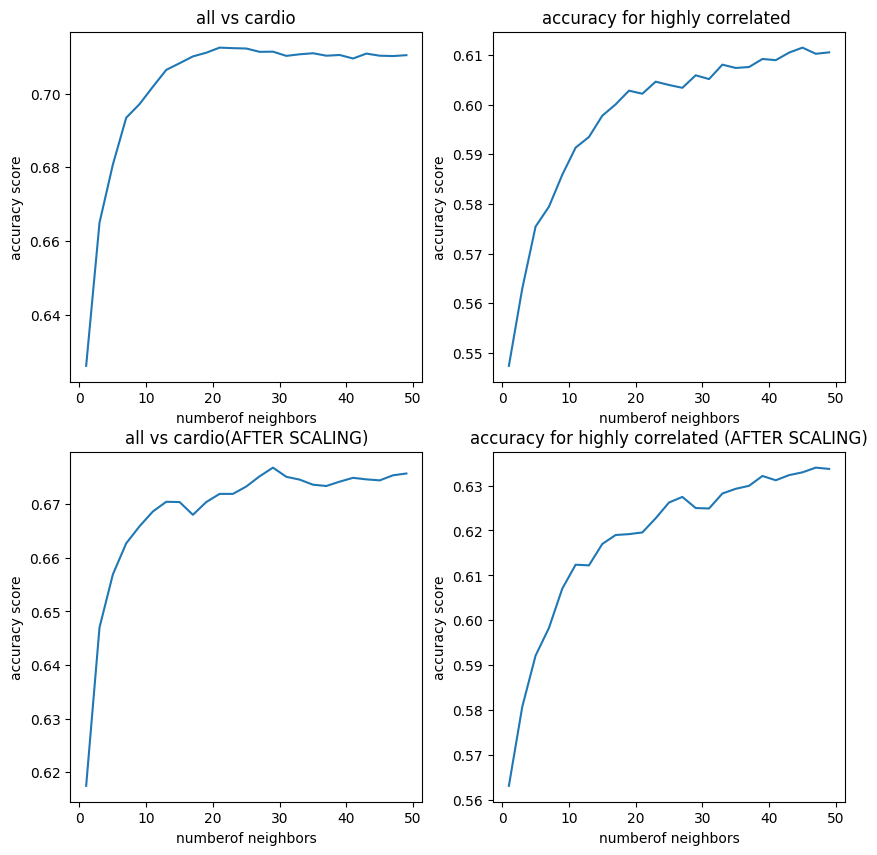

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(list(result.keys()),list(result.values()))
plt.title('all vs cardio')
plt.xlabel('numberof neighbors')
plt.ylabel('accuracy score')
plt.subplot(2,2,2)
plt.plot(list(result1.keys()),list(result1.values()))
plt.title('accuracy for highly correlated ')
plt.xlabel('numberof neighbors')
plt.ylabel('accuracy score')
plt.subplot(2,2,3)
plt.plot(list(result2.keys()),list(result2.values()))
plt.title('all vs cardio(AFTER SCALING)')
plt.xlabel('numberof neighbors')
plt.ylabel('accuracy score')
plt.subplot(2,2,4)
plt.plot(list(result3.keys()),list(result3.values()))
plt.title('accuracy for highly correlated (AFTER SCALING)')
plt.xlabel('numberof neighbors')
plt.ylabel('accuracy score')
plt.show()

In [ ]:
#print confusion matrix
print(confusion_matrix(y_test,knn_pred))

[[6671 3790]
 [3902 6637]]


In [ ]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.63      0.64      0.63     10461
           1       0.64      0.63      0.63     10539

    accuracy                           0.63     21000
   macro avg       0.63      0.63      0.63     21000
weighted avg       0.63      0.63      0.63     21000



In [ ]:
k=10
for i in range(5,k,2):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x3_train,y3_train)
  knn_pred=knn.predict(x3_test)
  print("The number of neighbors",i)
  print(accuracy_score(y3_test,knn_pred))
  print(confusion_matrix(y3_test,knn_pred))
  print(classification_report(y3_test,knn_pred))
  print("---------------------------------")

The number of neighbors 5
0.5921428571428572
[[6173 4288]
 [4277 6262]]
              precision    recall  f1-score   support

           0       0.59      0.59      0.59     10461
           1       0.59      0.59      0.59     10539

    accuracy                           0.59     21000
   macro avg       0.59      0.59      0.59     21000
weighted avg       0.59      0.59      0.59     21000

---------------------------------
The number of neighbors 7
0.5982857142857143
[[6289 4172]
 [4264 6275]]
              precision    recall  f1-score   support

           0       0.60      0.60      0.60     10461
           1       0.60      0.60      0.60     10539

    accuracy                           0.60     21000
   macro avg       0.60      0.60      0.60     21000
weighted avg       0.60      0.60      0.60     21000

---------------------------------
The number of neighbors 9
0.6070476190476191
[[6403 4058]
 [4194 6345]]
              precision    recall  f1-score   support

       